In [12]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import json
import re

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
file_name = 'banks.json'

In [14]:
df = pd.read_json(file_name)
df.head()

,mark,text,url
0,1.0,\n\t\t\t\t\t\t\tНикогда не пишу негативные отз...,https://www.banki.ru/services/responses/bank/r...
1,2.0,\n\t\t\t\t\t\t\tДобрый день! Хочу обратиться с...,https://www.banki.ru/services/responses/bank/r...
2,1.0,\n\t\t\t\t\t\t\tЧерез 1 день после подачи заяв...,https://www.banki.ru/services/responses/bank/r...
3,5.0,\n\t\t\t\t\t\t\tРанее обращалась по поводу нев...,https://www.banki.ru/services/responses/bank/r...
4,5.0,\n\t\t\t\t\t\t\tХочу искренне поблагодарить фи...,https://www.banki.ru/services/responses/bank/r...


In [15]:
df['text'] = df['text'].apply(lambda x: x.strip())
df.head()

,mark,text,url
0,1.0,Никогда не пишу негативные отзывы. Но в этом с...,https://www.banki.ru/services/responses/bank/r...
1,2.0,Добрый день! Хочу обратиться с просьбой разобр...,https://www.banki.ru/services/responses/bank/r...
2,1.0,Через 1 день после подачи заявки мне ее соглас...,https://www.banki.ru/services/responses/bank/r...
3,5.0,Ранее обращалась по поводу неверно рассчитанны...,https://www.banki.ru/services/responses/bank/r...
4,5.0,Хочу искренне поблагодарить филиал в целом и о...,https://www.banki.ru/services/responses/bank/r...


In [16]:
df_not_null = df[~df['mark'].isnull()]
df_not_null = df_not_null[~df_not_null['text'].isnull()]
df_not_null = df_not_null[df_not_null['text'] != '']
df_not_null.head()

,mark,text,url
0,1.0,Никогда не пишу негативные отзывы. Но в этом с...,https://www.banki.ru/services/responses/bank/r...
1,2.0,Добрый день! Хочу обратиться с просьбой разобр...,https://www.banki.ru/services/responses/bank/r...
2,1.0,Через 1 день после подачи заявки мне ее соглас...,https://www.banki.ru/services/responses/bank/r...
3,5.0,Ранее обращалась по поводу неверно рассчитанны...,https://www.banki.ru/services/responses/bank/r...
4,5.0,Хочу искренне поблагодарить филиал в целом и о...,https://www.banki.ru/services/responses/bank/r...


In [17]:
df_not_null.isnull().any()

mark    False
text    False
url     False
dtype: bool

In [18]:
print(df.shape[0], df_not_null.shape[0])

24838 15910


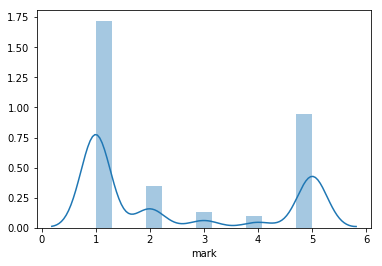

In [19]:
sns.distplot(df_not_null['mark'])
plt.show()

In [20]:
df_not_null.loc[df_not_null['mark'] < 3, 'mark'] = 0
df_not_null.loc[df_not_null['mark'] >= 3, 'mark'] = 1
df_not_null.head()

,mark,text,url
0,0.0,Никогда не пишу негативные отзывы. Но в этом с...,https://www.banki.ru/services/responses/bank/r...
1,0.0,Добрый день! Хочу обратиться с просьбой разобр...,https://www.banki.ru/services/responses/bank/r...
2,0.0,Через 1 день после подачи заявки мне ее соглас...,https://www.banki.ru/services/responses/bank/r...
3,1.0,Ранее обращалась по поводу неверно рассчитанны...,https://www.banki.ru/services/responses/bank/r...
4,1.0,Хочу искренне поблагодарить филиал в целом и о...,https://www.banki.ru/services/responses/bank/r...


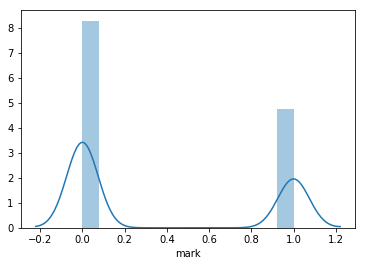

In [21]:
sns.distplot(df_not_null['mark'])
plt.show()

In [22]:
df_not_null.to_csv('review_data.csv', index=False)